<a href="https://colab.research.google.com/github/KARINAgoncalvesSOARES/Machine_Learning/blob/main/machinelearning_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align="center"> Machine Learning: Classificação

Data Scientist Jr.: Karina Gonçalves Soares

Link de estudo:

*[ML-Classificação](https://github.com/EddyGiusepe/Machine_Learning/blob/main/5_ML_Classification.ipynb) 

Aqui aprenderemos a tarefa de Classificação. A diferença da Regressão, na qual o objetivo era predezir o valor de uma variável com respeito a diferentes características, em classificação o objetivo é atribuir uma classe (Etiqueta, Label ... são os nomes comuns) a partir das diferentes características. Por exemplo: a classificação de imagens; onde se tenta atribuir uma etiqueta em função do valor dos píxeis.

#Regressão Logística

Este modelo leva no nome regressão mas, é um modelo de classificação. Se chama assim porque o modelo usado é o mesmo que usamos em scripts anteriores para Regressão linear, aplicando uma função sigmoid à saída do modelo. Esta função transformará o valor da saída num valor entre 0 e 1 que pode ser interpretado como uma probabilidade. Aplicando um umbral à saída poderemos decidir se a amostra em questão pertence a uma classe ou não (por exemplo: se a probabilidade é maior que 50%). Assim pois, este modelo não servirá para a tarefa de classificação binaria.



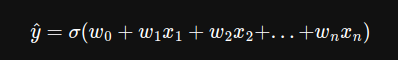

onde 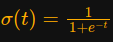 é a função sigmoidal.

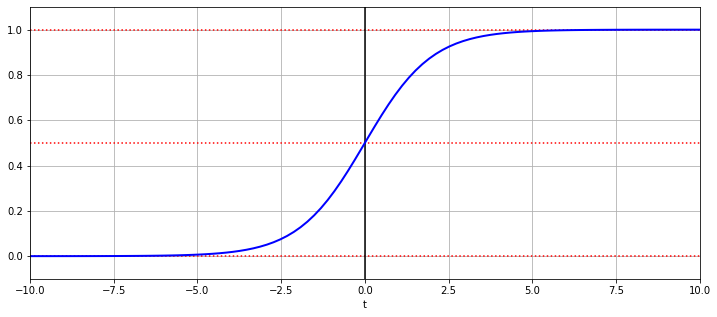

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt


t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))


plt.figure(figsize=(12, 5))
plt.plot([-10, 10], [0, 0], "r:")
plt.plot([-10, 10], [0.5, 0.5], "r:")
plt.plot([-10, 10], [1, 1], "r:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"")
plt.xlabel("t")
#plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.grid(True)
plt.show()
     

A seguir vamos realizar um exemplo aplicando à CLASSIFICAÇÃO DE FLORES com o Dataset Iris, cujo objetivo é classificar flores em 3 classes distintas em função do tamanho (comprimento e largura) de suas pétalas e sépalos (quatro características).

In [ ]:
from sklearn import datasets

import warnings
warnings.filterwarnings("ignore")

# Carregamos nossos Dados
iris = datasets.load_iris()

Para começar de maneira mais simples vamos usar apenas uma característica (a largura das pétalas) e para a classificação binária ficaremos apenas como uma classe.



In [ ]:
X = iris["data"][:, 3:] # largura da pétala

y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [ ]:
X.shape

(150, 1)

In [ ]:
y.shape

(150,)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", random_state=42)

# Aqui treinamos
log_reg.fit(X, y)

LogisticRegression(random_state=42)

In [ ]:
X_new = [[1.7], [1.5]]
# predict --> para fazer predições
y_new = log_reg.predict(X_new)
y_new

array([1, 0])

Podemos observar que uma flor com largura de pétala de 1.7 é classificada como o tipo de Iris Virginica e para uma largura de 1.5 não é Iris Virginica.

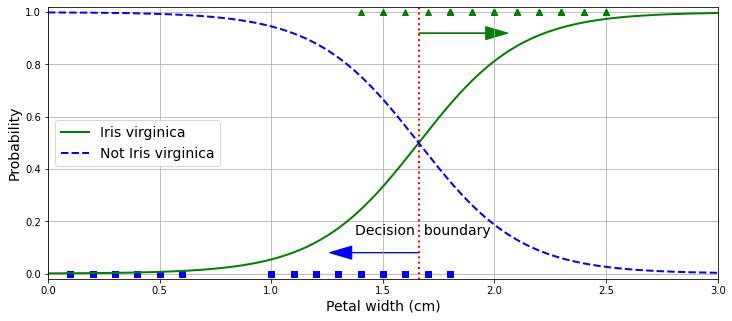

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]


plt.figure(figsize=(12, 5))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "r:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.grid(True)
plt.show()

Podemos observar que entorno de 1.6cm o modelo pode atribuir uma classe ou outra, no entanto comete erros já que esta fronteira é difusa. Podemos ajustar o ponto de corte em função de se queremos mais ou menos FALSOS POSITIVOS ou FALSOS NEGATIVOS, o qual veremos mais para frente, em outro Script.

In [ ]:
X = iris["data"][:, (2, 3)]  # comprimento da pétala, largura da pétala
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=10000000000, random_state=42)

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # gerador de marcador de configuração e mapa de cores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plota a superfície de decisão
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.figure(figsize=(12, 5))
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    
    # destacar exemplos de teste
    if test_idx:
        # plota todos os exemplos
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

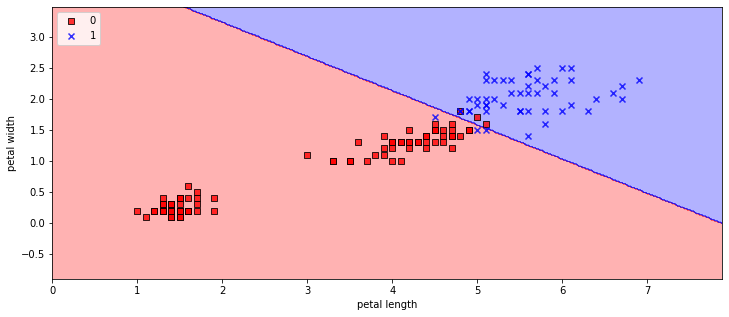

In [ ]:
plot_decision_regions(X, y, log_reg)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

Se visualizamos a fronteira de decisão observamos novamente que nosso modelo de REGRESSÃO LOGÍSTICA só funcionará bem no caso que nossas amostras sejam LINEARMENTE SEPARAVÉIS. Se não for assim, teremos erros já que o modelo não é capaz de separar os Dados melhor que uma LINHA RETA. De novo o processo de feature engineering consistirá em trabalhar sobre estes atributos (features) que temos, seja mudando sua representação ou criando novas variáveis, para que possam ser linearmente separáveis (ou pelo menos com baixo error).

#Softmax Regression

O modelo anterior é muito útil na hora de resolver tarefas de CLASSIFICAÇÃO BINÁRIA, no entanto há muitas ocasiões nas quais queremos classificar amostras de MÚLTIPLAS CLASSES. Para isso podemos usar o mdoelo de SOFTMAX REGRESSION. Este modelo consiste em usar vários modelos de Regressão Linear de uma vez, aplicando uma Função Softmax à saída para transformar os valores em uma DISTRIBUIÇÃO DE PROBABILIDADE. Para saber a que classe pertence uma amostra, simplesmente escolheremos aquela que apresente o valor máximo.



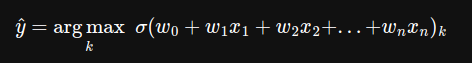

onde 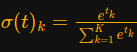 é a Função Softmax.

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)

# Agora treinamos
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [ ]:
print("A classe é: ", softmax_reg.predict([[5, 2]]))
print("")
print("As probabilidades para cada classe são: ", softmax_reg.predict_proba([[5, 2]]))

A classe é:  [2]

As probabilidades para cada classe são:  [[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


Neste caso, para uma flor com comprimento e largura da pétala de 5 e 3cm respectivamente, o modelo atribui a CLASSE 2. 
Podemos observar, também, as PROBABILIDADES atribuídas a cada classe (a CLASSE ATRIBUÍDA é aquela com probabilidade MÁXIMA).

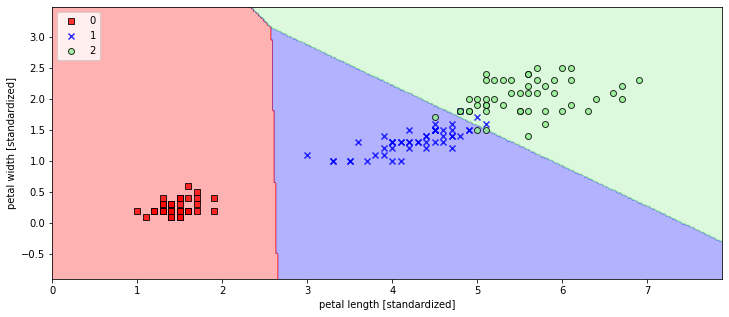

In [ ]:
plot_decision_regions(X, y, softmax_reg)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

Mais uma vez, este modelo só é capaz de separar os Dados usando LINHAS, se estes não foram Linearmente Separáveis teremos erros e necessitaremos usar feature engineering ou bem usar modelos mais sofisticados que estudaremos nos seguintes scripts.

#Descenso por Gradiente

Da mesma maneira que para o caso da Regressão Linear, estes modelos precisam ter todo o Dataset em memoria para poder ser treinado. No caso em que seja possível, podemos recorrer ao Algoritmo de Gradient Descent.

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [ ]:
X.shape

(150, 2)

In [ ]:
y.shape

(150,)

Separamos algumas amostras para Validação.

In [ ]:
import numpy as np


X_with_bias = np.c_[np.ones([len(X), 1]), X] # adicione o termo de bias (x0 = 1)

test_ratio = 0.2
total_size = len(X)

test_size = int(total_size * test_ratio)
train_size = total_size - test_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

X_train.shape, X_test.shape

((120, 3), (30, 3))

Para poder treinar nosso modelo com o algoritmo de Descenso por Gradiente devemos transformar nossas etiquetas em probabilidades.

In [ ]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

a = np.array([0, 1, 2])
a_one_hot = np.array([[1., 0., 0.],
                      [0., 1., 0.],
                      [0., 0., 1.]])

assert np.allclose(a_one_hot,to_one_hot(a))

Y_train_one_hot = to_one_hot(y_train)
Y_test_one_hot = to_one_hot(y_test)

Agora já podemos treinar nosso modelo. Lembre que para aplicar o algoritmo de descenso por gradiente precisamos de uma função de perda e sua derivada. Para o caso da Regressão logística podemos usar a função log-loss.

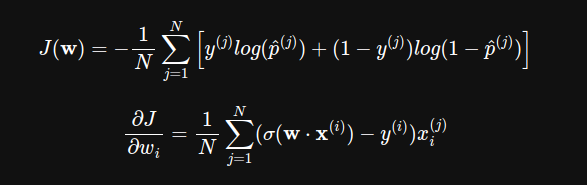

Enquanto, que se usarmos a função softmax deveremos aplicar a função Cross-Entropy.

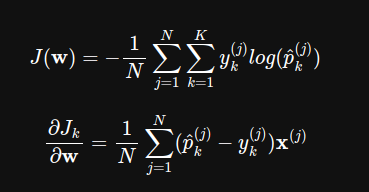

In [ ]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums
    

n_features = X_train.shape[1] # == 3 (2 features mais o termo de bias)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

w = np.random.randn(n_features, n_outputs)


for iteration in range(n_iterations):
    logits = X_train.dot(w)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m *X_train.T.dot(error)
    w = w - eta * gradients
     

0 0.9299087294192044
500 0.6132955280665277
1000 0.5559666849215341
1500 0.5149295579436218
2000 0.48365563877597634
2500 0.45872749109989136
3000 0.43818681962865763
3500 0.42082757724766395
4000 0.4058632034161086
4500 0.39275658382143513
5000 0.38112696304140786


In [ ]:
logits = X_test.dot(w)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9666666666666667

Nosso modelo chega a uma accuracy de 90% nos Dados de teste, e podemos visualizar as fronteiras de decisão que, como é de se esperar, são também Lineares.

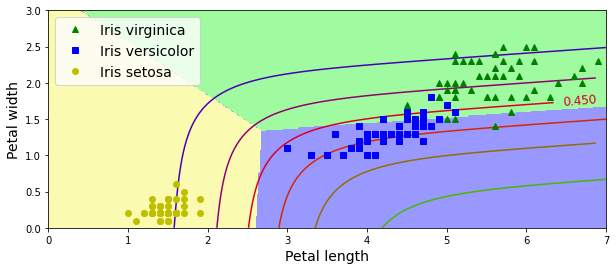

In [ ]:
import matplotlib.pyplot as plt 

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(w)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3])
plt.show()